## Band Structure and DOS

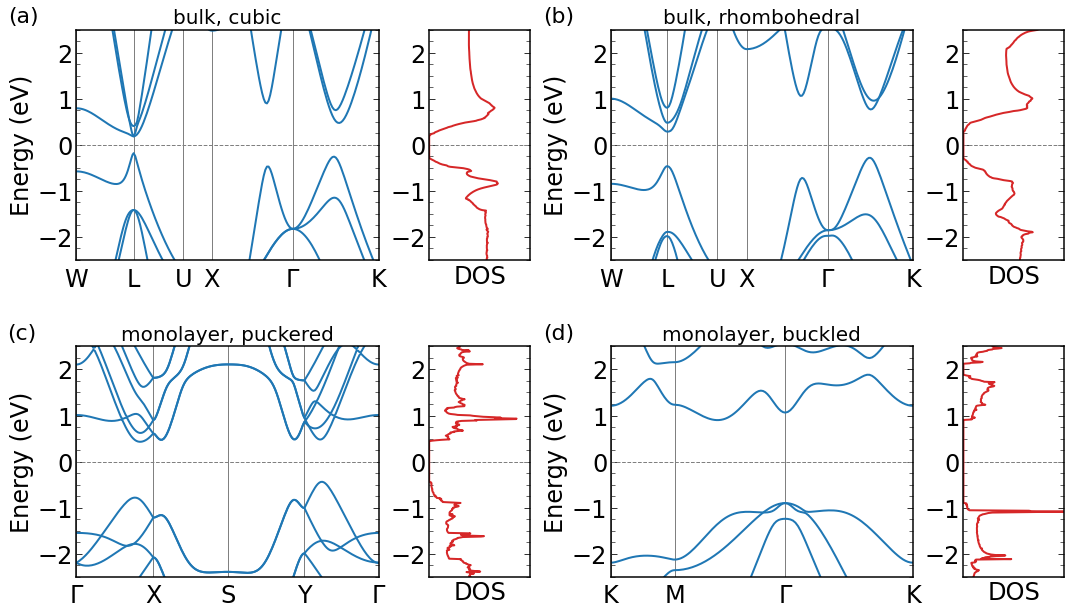

In [1]:
# Import required packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 24
plt.rcParams['axes.linewidth'] = 1.5

# Create figure object
fig = plt.figure(figsize=(14, 8))

# Add x and y-axes 
axBnd1 = fig.add_axes([0.00, 0.55, 0.30, 0.40])
axDOS1 = fig.add_axes([0.35, 0.55, 0.10, 0.40])

axBnd2 = fig.add_axes([0.53, 0.55, 0.30, 0.40])
axDOS2 = fig.add_axes([0.88, 0.55, 0.10, 0.40])

axBnd3 = fig.add_axes([0.00, 0.00, 0.30, 0.40])
axDOS3 = fig.add_axes([0.35, 0.00, 0.10, 0.40])

axBnd4 = fig.add_axes([0.53, 0.00, 0.30, 0.40])
axDOS4 = fig.add_axes([0.88, 0.00, 0.10, 0.40])


# Add x and y-axis labels 
axBnd1.set_xlabel('')
axBnd1.set_ylabel('Energy (eV)')
axDOS1.set_xlabel('DOS')

axBnd2.set_xlabel('')
axBnd2.set_ylabel('Energy (eV)')
axDOS2.set_xlabel('DOS')

axBnd3.set_xlabel('')
axBnd3.set_ylabel('Energy (eV)')
axDOS3.set_xlabel('DOS')

axBnd4.set_xlabel('')
axBnd4.set_ylabel('Energy (eV)')
axDOS4.set_xlabel('DOS')

# Hide x-axis original tick marks
axBnd1.xaxis.set_tick_params(which='both', bottom=False, top=False)
axDOS1.xaxis.set_tick_params(which='both', bottom=False, top=False)

axBnd2.xaxis.set_tick_params(which='both', bottom=False, top=False)
axDOS2.xaxis.set_tick_params(which='both', bottom=False, top=False)

axBnd3.xaxis.set_tick_params(which='both', bottom=False, top=False)
axDOS3.xaxis.set_tick_params(which='both', bottom=False, top=False)

axBnd4.xaxis.set_tick_params(which='both', bottom=False, top=False)
axDOS4.xaxis.set_tick_params(which='both', bottom=False, top=False)

# Hide x-axis tick labels for DOS
axDOS1.set_xticks([])
axDOS2.set_xticks([])
axDOS3.set_xticks([])
axDOS4.set_xticks([])

# Major tick interval in y-axis every 1 eV
axBnd1.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
axDOS1.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1))

axBnd2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
axDOS2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1))

axBnd3.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
axDOS3.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1))

axBnd4.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
axDOS4.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1))

# Minor tick interval in y-axis every 0.25 eV
axBnd1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))
axDOS1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))

axBnd2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))
axDOS2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))

axBnd3.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))
axDOS3.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))

axBnd4.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))
axDOS4.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))

# Edit the major and minor ticks of the x and y axes
axBnd1.yaxis.set_tick_params(which='major', size=6, direction='in', right='on')
axBnd1.yaxis.set_tick_params(which='minor', size=4, direction='in', right='on')
axDOS1.yaxis.set_tick_params(which='major', size=6, direction='in', right='on')
axDOS1.yaxis.set_tick_params(which='minor', size=4, direction='in', right='on')

axBnd2.yaxis.set_tick_params(which='major', size=6, direction='in', right='on')
axBnd2.yaxis.set_tick_params(which='minor', size=4, direction='in', right='on')
axDOS2.yaxis.set_tick_params(which='major', size=6, direction='in', right='on')
axDOS2.yaxis.set_tick_params(which='minor', size=4, direction='in', right='on')

axBnd3.yaxis.set_tick_params(which='major', size=6, direction='in', right='on')
axBnd3.yaxis.set_tick_params(which='minor', size=4, direction='in', right='on')
axDOS3.yaxis.set_tick_params(which='major', size=6, direction='in', right='on')
axDOS3.yaxis.set_tick_params(which='minor', size=4, direction='in', right='on')

axBnd4.yaxis.set_tick_params(which='major', size=6, direction='in', right='on')
axBnd4.yaxis.set_tick_params(which='minor', size=4, direction='in', right='on')
axDOS4.yaxis.set_tick_params(which='major', size=6, direction='in', right='on')
axDOS4.yaxis.set_tick_params(which='minor', size=4, direction='in', right='on')

emin = -2.5
emax = 2.5

#################################################################################
prefix = 'GeTe-c' # bulk cubic lattice
#################################################################################

# Folder location
bndfolder = 'bulk-c/band/'
dosfolder = 'bulk-c/dos/'

# Number of bands and k-points from *.bands
nbnd = 30; nks = 201

# Fermi energy, find it in *.scf.out and *.dos
efbnd = (10.8292+11.2061)/2
efdos = (10.8292+11.2061)/2

# Open *.bands.gnu file
fbnd = open(bndfolder+prefix+'.bands.gnu', 'r')
f_bnd = [line for line in fbnd.readlines() if line.strip()]
fbnd.close()

# Read k-points
rks = []
for ik in range(nks):
    rks.append(float(f_bnd[ik].split()[0]))

# Set high-symmetry points from *.nscf.in file
rW = rks[0]  ; rL = rks[50] ; rU = rks[80]
rX = rks[100]; rG = rks[150]; rK = rks[200]

# Read band index at each k-point
band = []
for ib in range (nbnd):
    band.append([])
    for ik in range(nks):
        tmp = f_bnd[ib*nks+ik].split()[1]
        band[ib].append(float(tmp)-efbnd)
        
# Read eigen-energy at each band index
ener = []
for ik in range(nks):
    ener.append([])
    for ib in range(nbnd):
        tmp = band[ib][ik]
        ener[ik].append(float(tmp))
        
# Open and read DOS data from *.dos file
with open(dosfolder+prefix+'.dos') as fdos:
    next(fdos) # skip header row
    lines = fdos.readlines()
    edos  = np.array([line.split()[0] for line in lines], dtype=float)
    dos   = np.array([line.split()[1] for line in lines], dtype=float)
fdos.close()

#--------------------------------------------------------------------------------
# Set limit and tick labels for high-symmetry points
axBnd1.set_xlim(rW, rK)
axBnd1.set_xticks([rW, rL, rU, rX, rG, rK])
axBnd1.set_xticklabels(['W', 'L', 'U', 'X', '$\Gamma$', 'K'])
axBnd1.set_ylim(emin,emax)
axDOS1.set_xlim(0,1)
axDOS1.set_ylim(emin,emax)

# Add dotted lines at middle high-symmetry points
axBnd1.axvline(rW, color='gray', linewidth=1)
axBnd1.axvline(rL, color='gray', linewidth=1)
axBnd1.axvline(rU, color='gray', linewidth=1)
axBnd1.axvline(rX, color='gray', linewidth=1)
axBnd1.axvline(rG, color='gray', linewidth=1)
axBnd1.axvline(rK, color='gray', linewidth=1)

# Add dotted line at Fermi energy
axBnd1.axhline(0, color= 'gray', linestyle='--', linewidth=1)
axDOS1.axhline(0, color= 'gray', linestyle='--', linewidth=1)

# Plot band structure and DOS
axBnd1.plot(rks, ener, color = 'C0', linewidth=2)
axDOS1.plot(dos/np.max(dos), edos-efdos, color = 'C3', linewidth=2)

# Set title
axBnd1.set_title('bulk, cubic', fontsize=20)
axBnd1.text(-0.6, 2.65, '(a)', fontsize=22)

#################################################################################
prefix = 'GeTe-r' # bulk rhombohedral lattice
#################################################################################

# Folder location
bndfolder = 'bulk-r/band/'
dosfolder = 'bulk-r/dos/'

# Number of bands and k-points from *.bands
nbnd = 30; nks = 201

# Fermi energy, find it in *.scf.out and *.dos
efbnd = (10.2944+10.8609)/2
efdos = (10.2944+10.8609)/2

# Open *.bands.gnu file
fbnd = open(bndfolder+prefix+'.bands.gnu', 'r')
f_bnd = [line for line in fbnd.readlines() if line.strip()]
fbnd.close()

# Read k-points
rks = []
for ik in range(nks):
    rks.append(float(f_bnd[ik].split()[0]))

# Set high-symmetry points from *.nscf.in file
rW = rks[0]  ; rL = rks[50] ; rU = rks[80]
rX = rks[100]; rG = rks[150]; rK = rks[200]

# Read band index at each k-point
band = []
for ib in range (nbnd):
    band.append([])
    for ik in range(nks):
        tmp = f_bnd[ib*nks+ik].split()[1]
        band[ib].append(float(tmp)-efbnd)
        
# Read eigen-energy at each band index
ener = []
for ik in range(nks):
    ener.append([])
    for ib in range(nbnd):
        tmp = band[ib][ik]
        ener[ik].append(float(tmp))
        
# Open and read DOS data from *.dos file
with open(dosfolder+prefix+'.dos') as fdos:
    next(fdos) # skip header row
    lines = fdos.readlines()
    edos  = np.array([line.split()[0] for line in lines], dtype=float)
    dos   = np.array([line.split()[1] for line in lines], dtype=float)
fdos.close()

#--------------------------------------------------------------------------------
# Set limit and tick labels for high-symmetry points
axBnd2.set_xlim(rW, rK)
axBnd2.set_xticks([rW, rL, rU, rX, rG, rK])
axBnd2.set_xticklabels(['W', 'L', 'U', 'X', '$\Gamma$', 'K'])
axBnd2.set_ylim(emin,emax)
axDOS2.set_xlim(0,1)
axDOS2.set_ylim(emin,emax)

# Add dotted lines at middle high-symmetry points
axBnd2.axvline(rW, color='gray', linewidth=1)
axBnd2.axvline(rL, color='gray', linewidth=1)
axBnd2.axvline(rU, color='gray', linewidth=1)
axBnd2.axvline(rX, color='gray', linewidth=1)
axBnd2.axvline(rG, color='gray', linewidth=1)
axBnd2.axvline(rK, color='gray', linewidth=1)

# Add dotted line at Fermi energy
axBnd2.axhline(0, color= 'gray', linestyle='--', linewidth=1)
axDOS2.axhline(0, color= 'gray', linestyle='--', linewidth=1)

# Plot band structure and DOS
axBnd2.plot(rks, ener, color = 'C0', linewidth=2)
axDOS2.plot(dos/np.max(dos), edos-efdos, color = 'C3', linewidth=2)

# Set title
axBnd2.set_title('bulk, rhombohedral', fontsize=20)
axBnd2.text(-0.6, 2.65, '(b)', fontsize=22)

#################################################################################
prefix = 'GeTe-mono' # monolayer puckered lattice
#################################################################################

# Folder location
bndfolder = 'mono-s/band/'
dosfolder = 'mono-s/dos/'

# Number of bands and k-points from *.bands
nbnd = 60; nks = 201

# Fermi energy, find it in *.scf.out and *.dos
efbnd = (0.1269+1.0273)/2
efdos = (0.1269+1.0273)/2

# Open *.bands.gnu file
fbnd = open(bndfolder+prefix+'.bands.gnu', 'r')
f_bnd = [line for line in fbnd.readlines() if line.strip()]
fbnd.close()

# Read k-points
rks = []
for ik in range(nks):
    rks.append(float(f_bnd[ik].split()[0]))

# Set high-symmetry points from *.nscf.in file
rG1 = rks[0]  ; rX  = rks[50] ; rS = rks[100]
rY  = rks[150]; rG2 = rks[200]

# Read band index at each k-point
band = []
for ib in range (nbnd):
    band.append([])
    for ik in range(nks):
        tmp = f_bnd[ib*nks+ik].split()[1]
        band[ib].append(float(tmp)-efbnd)
        
# Read eigen-energy at each band index
ener = []
for ik in range(nks):
    ener.append([])
    for ib in range(nbnd):
        tmp = band[ib][ik]
        ener[ik].append(float(tmp))
        
# Open and read DOS data from *.dos file
with open(dosfolder+prefix+'.dos') as fdos:
    next(fdos) # skip header row
    lines = fdos.readlines()
    edos  = np.array([line.split()[0] for line in lines], dtype=float)
    dos   = np.array([line.split()[1] for line in lines], dtype=float)
fdos.close()

#--------------------------------------------------------------------------------
# Set limit and tick labels for high-symmetry points
axBnd3.set_xlim(rG1, rG2)
axBnd3.set_xticks([rG1, rX, rS, rY, rG2])
axBnd3.set_xticklabels(['$\Gamma$', 'X', 'S', 'Y', '$\Gamma$'])
axBnd3.set_ylim(emin,emax)
axDOS3.set_xlim(0,1)
axDOS3.set_ylim(emin,emax)

# Add dotted lines at middle high-symmetry points
axBnd3.axvline(rG1, color='gray', linewidth=1)
axBnd3.axvline(rX,  color='gray', linewidth=1)
axBnd3.axvline(rS,  color='gray', linewidth=1)
axBnd3.axvline(rY,  color='gray', linewidth=1)
axBnd3.axvline(rG2, color='gray', linewidth=1)

# Add dotted line at Fermi energy
axBnd3.axhline(0, color= 'gray', linestyle='--', linewidth=1)
axDOS3.axhline(0, color= 'gray', linestyle='--', linewidth=1)

# Plot band structure and DOS
axBnd3.plot(rks, ener, color = 'C0', linewidth=2)
axDOS3.plot(dos/np.max(dos), edos-efdos, color = 'C3', linewidth=2)

# Set title
axBnd3.set_title('monolayer, puckered', fontsize=20)
axBnd3.text(-0.45, 2.65, '(c)', fontsize=22)

#################################################################################
prefix = 'GeTe-mono' # monolayer buckled lattice
#################################################################################

# Folder location
bndfolder = 'mono-h/band/'
dosfolder = 'mono-h/dos/'

# Number of bands and k-points from *.bands
nbnd = 24; nks = 151

# Fermi energy, find it in *.scf.out and *.dos
efbnd = (-2.1886-0.3791)/2
efdos = (-2.1886-0.3791)/2

# Open *.bands.gnu file
fbnd = open(bndfolder+prefix+'.bands.gnu', 'r')
f_bnd = [line for line in fbnd.readlines() if line.strip()]
fbnd.close()

# Read k-points
rks = []
for ik in range(nks):
    rks.append(float(f_bnd[ik].split()[0]))

# Set high-symmetry points from *.nscf.in file
rK1 = rks[0]   ; rM  = rks[50]
rG  = rks[100] ; rK2 = rks[150]

# Read band index at each k-point
band = []
for ib in range (nbnd):
    band.append([])
    for ik in range(nks):
        tmp = f_bnd[ib*nks+ik].split()[1]
        band[ib].append(float(tmp)-efbnd)
        
# Read eigen-energy at each band index
ener = []
for ik in range(nks):
    ener.append([])
    for ib in range(nbnd):
        tmp = band[ib][ik]
        ener[ik].append(float(tmp))
        
# Open and read DOS data from *.dos file
with open(dosfolder+prefix+'.dos') as fdos:
    next(fdos) # skip header row
    lines = fdos.readlines()
    edos  = np.array([line.split()[0] for line in lines], dtype=float)
    dos   = np.array([line.split()[1] for line in lines], dtype=float)
fdos.close()

#--------------------------------------------------------------------------------
# Set limit and tick labels for high-symmetry points
axBnd4.set_xlim(rK1, rK2)
axBnd4.set_xticks([rK1, rM, rG, rK2])
axBnd4.set_xticklabels(['K', 'M', '$\Gamma$', 'K'])
axBnd4.set_ylim(emin,emax)
axDOS4.set_xlim(0,1)
axDOS4.set_ylim(emin,emax)

# Add dotted lines at middle high-symmetry points
axBnd4.axvline(rK1, color='gray', linewidth=1)
axBnd4.axvline(rM,  color='gray', linewidth=1)
axBnd4.axvline(rG,  color='gray', linewidth=1)
axBnd4.axvline(rK2, color='gray', linewidth=1)

# Add dotted line at Fermi energy
axBnd4.axhline(0, color= 'gray', linestyle='--', linewidth=1)
axDOS4.axhline(0, color= 'gray', linestyle='--', linewidth=1)

# Plot band structure and DOS
axBnd4.plot(rks, ener, color = 'C0', linewidth=2)
axDOS4.plot(dos/np.max(dos), edos-efdos, color = 'C3', linewidth=2)

# Set title
axBnd4.set_title('monolayer, buckled', fontsize=20)
axBnd4.text(-0.35, 2.65, '(d)', fontsize=22)

#################################################################################
# Save figure
plt.savefig('FigBandDOS.pdf',bbox_inches='tight')

## Optical properties

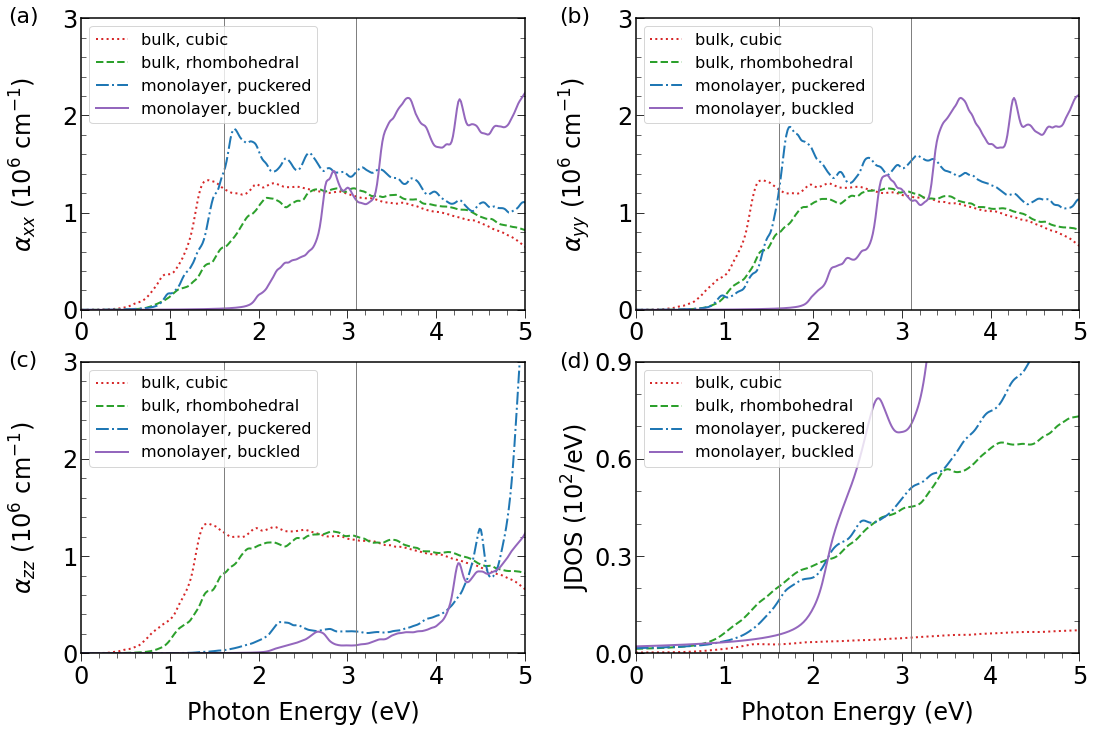

In [2]:
# Import required packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

c         = 2.99792458  # (10^8 m/s)
hbar      = 6.582119569 # (10^{-16} eV.s)
alphapref = 2/(hbar*c)  # (10^8 / m or 10^6 / cm) 

# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 24
plt.rcParams['axes.linewidth'] = 1.5

# Create figure object
fig = plt.figure(figsize=(14, 9))

# Add x and y-axes 
axAlpX = fig.add_axes([0.00, 0.53, 0.44, 0.45])
axAlpY = fig.add_axes([0.55, 0.53, 0.44, 0.45])
axAlpZ = fig.add_axes([0.00, 0.00, 0.44, 0.45])
axJDOS = fig.add_axes([0.55, 0.00, 0.44, 0.45])

# Data filename prefix
ReEps = 'epsr_'
ImEps = 'epsi_'
JDOS  = 'jdos_'

######################################################
# bulk Cubic
######################################################
epsfolderGeTeC = 'bulk-c/epsilon/' 
prefGeTeC      = 'GeTe-c'
fReGeTeC       = epsfolderGeTeC+ReEps+prefGeTeC+'.dat'
fImGeTeC       = epsfolderGeTeC+ImEps+prefGeTeC+'.dat'
fJDGeTeC       = epsfolderGeTeC+JDOS+prefGeTeC+'.dat'

EnGeTeC, ReEpsXGeTeC, ReEpsYGeTeC, ReEpsZGeTeC = np.loadtxt(fReGeTeC,unpack=True,skiprows=2)
EnGeTeC, ImEpsXGeTeC, ImEpsYGeTeC, ImEpsZGeTeC = np.loadtxt(fImGeTeC,unpack=True,skiprows=2)
EJGeTeC, JDGeTeC = np.loadtxt(fJDGeTeC,unpack=True,skiprows=2)

AlpXGeTeC = alphapref * EnGeTeC * np.sqrt((np.sqrt(ReEpsXGeTeC**2+ ImEpsXGeTeC**2)-ReEpsXGeTeC)/2)
AlpYGeTeC = alphapref * EnGeTeC * np.sqrt((np.sqrt(ReEpsYGeTeC**2+ ImEpsYGeTeC**2)-ReEpsYGeTeC)/2)
AlpZGeTeC = alphapref * EnGeTeC * np.sqrt((np.sqrt(ReEpsZGeTeC**2+ ImEpsZGeTeC**2)-ReEpsZGeTeC)/2)

######################################################
# bulk Rhombohedral
######################################################
epsfolderGeTeR = 'bulk-r/epsilon/' 
prefGeTeR      = 'GeTe-r'
fReGeTeR       = epsfolderGeTeR+ReEps+prefGeTeR+'.dat'
fImGeTeR       = epsfolderGeTeR+ImEps+prefGeTeR+'.dat'
fJDGeTeR       = epsfolderGeTeR+JDOS+prefGeTeR+'.dat'

EnGeTeR, ReEpsXGeTeR, ReEpsYGeTeR, ReEpsZGeTeR = np.loadtxt(fReGeTeR,unpack=True,skiprows=2)
EnGeTeR, ImEpsXGeTeR, ImEpsYGeTeR, ImEpsZGeTeR = np.loadtxt(fImGeTeR,unpack=True,skiprows=2)
EJGeTeR, JDGeTeR = np.loadtxt(fJDGeTeR,unpack=True,skiprows=2)

AlpXGeTeR = alphapref * EnGeTeR * np.sqrt((np.sqrt(ReEpsXGeTeR**2+ ImEpsXGeTeR**2)-ReEpsXGeTeR)/2)
AlpYGeTeR = alphapref * EnGeTeR * np.sqrt((np.sqrt(ReEpsYGeTeR**2+ ImEpsYGeTeR**2)-ReEpsYGeTeR)/2)
AlpZGeTeR = alphapref * EnGeTeR * np.sqrt((np.sqrt(ReEpsZGeTeR**2+ ImEpsZGeTeR**2)-ReEpsZGeTeR)/2)

######################################################
# monolayer Puckered
######################################################
epsfolderGeTeP = 'mono-s/epsilon/' 
prefGeTeP      = 'GeTe-mono'
fReGeTeP       = epsfolderGeTeP+ReEps+prefGeTeP+'.dat'
fImGeTeP       = epsfolderGeTeP+ImEps+prefGeTeP+'.dat'
fJDGeTeP       = epsfolderGeTeP+JDOS+prefGeTeP+'.dat'
lP             = 20/3.0494476984 # scaling factor for monolayer

EnGeTeP, ReEpsXGeTeP, ReEpsYGeTeP, ReEpsZGeTeP = np.loadtxt(fReGeTeP,unpack=True,skiprows=2)
EnGeTeP, ImEpsXGeTeP, ImEpsYGeTeP, ImEpsZGeTeP = np.loadtxt(fImGeTeP,unpack=True,skiprows=2)
EJGeTeP, JDGeTeP = np.loadtxt(fJDGeTeP,unpack=True,skiprows=2)

AlpXGeTeP = alphapref * EnGeTeP * np.sqrt((np.sqrt((lP*ReEpsXGeTeP)**2+
                                                   (lP*ImEpsXGeTeP)**2)-(lP*ReEpsXGeTeP))/2)
AlpYGeTeP = alphapref * EnGeTeP * np.sqrt((np.sqrt((lP*ReEpsYGeTeP)**2+ 
                                                   (lP*ImEpsYGeTeP)**2)-(lP*ReEpsYGeTeP))/2)
AlpZGeTeP = alphapref * EnGeTeP * np.sqrt((np.sqrt((lP*ReEpsZGeTeP)**2+ 
                                                   (lP*ImEpsZGeTeP)**2)-(lP*ReEpsZGeTeP))/2)

######################################################
# monolayer Buckled
######################################################
epsfolderGeTeB = 'mono-h/epsilon/' 
prefGeTeB      = 'GeTe-mono'
fReGeTeB       = epsfolderGeTeB+ReEps+prefGeTeB+'.dat'
fImGeTeB       = epsfolderGeTeB+ImEps+prefGeTeB+'.dat'
fJDGeTeB       = epsfolderGeTeB+JDOS+prefGeTeB+'.dat'
lB             = 20/1.55612398   # scaling factor for monolayer

EnGeTeB, ReEpsXGeTeB, ReEpsYGeTeB, ReEpsZGeTeB = np.loadtxt(fReGeTeB,unpack=True,skiprows=2)
EnGeTeB, ImEpsXGeTeB, ImEpsYGeTeB, ImEpsZGeTeB = np.loadtxt(fImGeTeB,unpack=True,skiprows=2)
EJGeTeB, JDGeTeB = np.loadtxt(fJDGeTeB,unpack=True,skiprows=2)

AlpXGeTeB = alphapref * EnGeTeB * np.sqrt((np.sqrt((lB*ReEpsXGeTeB)**2+
                                                   (lB*ImEpsXGeTeB)**2)-(lB*ReEpsXGeTeB))/2)
AlpYGeTeB = alphapref * EnGeTeB * np.sqrt((np.sqrt((lB*ReEpsYGeTeB)**2+
                                                   (lB*ImEpsYGeTeB)**2)-(lB*ReEpsYGeTeB))/2)
AlpZGeTeB = alphapref * EnGeTeB * np.sqrt((np.sqrt((lB*ReEpsZGeTeB)**2+ 
                                                   (lB*ImEpsZGeTeB)**2)-(lB*ReEpsZGeTeB))/2)

#----------------------------------------------------------------------
# Plotting
#----------------------------------------------------------------------
axAlpX.plot(EnGeTeC,AlpXGeTeC, color='C3', linestyle=':' , linewidth=2,
            label='bulk, cubic')
axAlpX.plot(EnGeTeR,AlpXGeTeR, color='C2', linestyle='--', linewidth=2,
            label='bulk, rhombohedral')
axAlpX.plot(EnGeTeP,AlpXGeTeP, color='C0', linestyle='-.', linewidth=2,
            label='monolayer, puckered')
axAlpX.plot(EnGeTeB,AlpXGeTeB, color='C4', linestyle='-' , linewidth=2,
            label='monolayer, buckled')
axAlpX.legend(loc='upper left',fontsize=16)

axAlpY.plot(EnGeTeC,AlpYGeTeC, color='C3', linestyle=':' , linewidth=2,
            label='bulk, cubic')
axAlpY.plot(EnGeTeR,AlpYGeTeR, color='C2', linestyle='--', linewidth=2,
            label='bulk, rhombohedral')
axAlpY.plot(EnGeTeP,AlpYGeTeP, color='C0', linestyle='-.', linewidth=2,
            label='monolayer, puckered')
axAlpY.plot(EnGeTeB,AlpYGeTeB, color='C4', linestyle='-' , linewidth=2,
            label='monolayer, buckled')
axAlpY.legend(loc='upper left',fontsize=16)

axAlpZ.plot(EnGeTeC,AlpZGeTeC, color='C3', linestyle=':' , linewidth=2,
            label='bulk, cubic')
axAlpZ.plot(EnGeTeR,AlpZGeTeR, color='C2', linestyle='--', linewidth=2,
            label='bulk, rhombohedral')
axAlpZ.plot(EnGeTeP,AlpZGeTeP, color='C0', linestyle='-.', linewidth=2,
            label='monolayer, puckered')
axAlpZ.plot(EnGeTeB,AlpZGeTeB, color='C4', linestyle='-' , linewidth=2,
            label='monolayer, buckled')
axAlpZ.legend(loc='upper left',fontsize=16)

axJDOS.plot(EJGeTeC,JDGeTeC*1e2,color='C3',linestyle=':' ,linewidth=2,
            label='bulk, cubic')
axJDOS.plot(EJGeTeR,JDGeTeR*1e2,color='C2',linestyle='--',linewidth=2,
            label='bulk, rhombohedral')
axJDOS.plot(EJGeTeP,JDGeTeP*1e2,color='C0',linestyle='-.',linewidth=2,
            label='monolayer, puckered')
axJDOS.plot(EJGeTeB,JDGeTeB*1e2,color='C4',linestyle='-' ,linewidth=2,
            label='monolayer, buckled')
axJDOS.legend(loc='upper left',fontsize=16)

# Edit the major and minor ticks of the y axes (alpha in all polarization)
axAlpX.xaxis.set_tick_params(which='major', size=8)
axAlpX.xaxis.set_tick_params(which='minor', size=5)
axAlpY.xaxis.set_tick_params(which='major', size=8)
axAlpY.xaxis.set_tick_params(which='minor', size=5)
axAlpZ.xaxis.set_tick_params(which='major', size=8)
axAlpZ.xaxis.set_tick_params(which='minor', size=5)
axJDOS.xaxis.set_tick_params(which='major', size=8)
axJDOS.xaxis.set_tick_params(which='minor', size=5)

axAlpX.yaxis.set_tick_params(which='major', size=8, direction='in', right='on')
axAlpX.yaxis.set_tick_params(which='minor', size=5, direction='in', right='on')
axAlpY.yaxis.set_tick_params(which='major', size=8, direction='in', right='on')
axAlpY.yaxis.set_tick_params(which='minor', size=5, direction='in', right='on')
axAlpZ.yaxis.set_tick_params(which='major', size=8, direction='in', right='on')
axAlpZ.yaxis.set_tick_params(which='minor', size=5, direction='in', right='on')
axJDOS.yaxis.set_tick_params(which='major', size=8, direction='in', right='on')
axJDOS.yaxis.set_tick_params(which='minor', size=5, direction='in', right='on')

## Major tick interval in y-axis every 1 (in 10^8 / m or 10^6 / cm)
## Minor tick interval in y-axis every 0.2 (in 10^8 / m or 10^6 / cm)

axAlpX.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
axAlpX.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.2))
axAlpX.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
axAlpX.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.2))
axAlpX.set_xlim(0,5); axAlpX.set_ylim(0,3)

axAlpY.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
axAlpY.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.2))
axAlpY.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
axAlpY.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.2))
axAlpY.set_xlim(0,5); axAlpY.set_ylim(0,3)

axAlpZ.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
axAlpZ.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.2))
axAlpZ.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
axAlpZ.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.2))
axAlpZ.set_xlim(0,5); axAlpZ.set_ylim(0,3)

axJDOS.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
axJDOS.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.2))
axJDOS.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.3))
axJDOS.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))
axJDOS.set_xlim(0,5); axJDOS.set_ylim(0,0.9)

## Format Axis Labels

axAlpX.set_ylabel(r'$\alpha_{xx}$ (10$^6$ cm$^{-1}$)', labelpad=24)
axAlpY.set_ylabel(r'$\alpha_{yy}$ (10$^6$ cm$^{-1}$)', labelpad=24)
axAlpZ.set_ylabel(r'$\alpha_{zz}$ (10$^6$ cm$^{-1}$)', labelpad=24)
axAlpZ.set_xlabel('Photon Energy (eV)', labelpad=12)
axJDOS.set_xlabel('Photon Energy (eV)', labelpad=12)
axJDOS.set_ylabel(r'JDOS ($10^2$/eV)' , labelpad=2)

## Give panel labels
axAlpX.text(-0.82, 2.95, '(a)', fontsize=22)
axAlpY.text(-0.86, 2.95, '(b)', fontsize=22)
axAlpZ.text(-0.82, 2.95, '(c)', fontsize=22)
axJDOS.text(-0.86, 0.88, '(d)', fontsize=22)

## vertical lines at visible range boundary
axAlpX.axvline(1.61, color= 'grey', linestyle='-', linewidth=1)
axAlpX.axvline(3.10, color= 'grey', linestyle='-', linewidth=1)
axAlpY.axvline(1.61, color= 'grey', linestyle='-', linewidth=1)
axAlpY.axvline(3.10, color= 'grey', linestyle='-', linewidth=1)
axAlpZ.axvline(1.61, color= 'grey', linestyle='-', linewidth=1)
axAlpZ.axvline(3.10, color= 'grey', linestyle='-', linewidth=1)
axJDOS.axvline(1.61, color= 'grey', linestyle='-', linewidth=1)
axJDOS.axvline(3.10, color= 'grey', linestyle='-', linewidth=1)

#################################################################################
# Save figure
plt.savefig('FigOptic.pdf',bbox_inches='tight')

## Thermoelectric properties

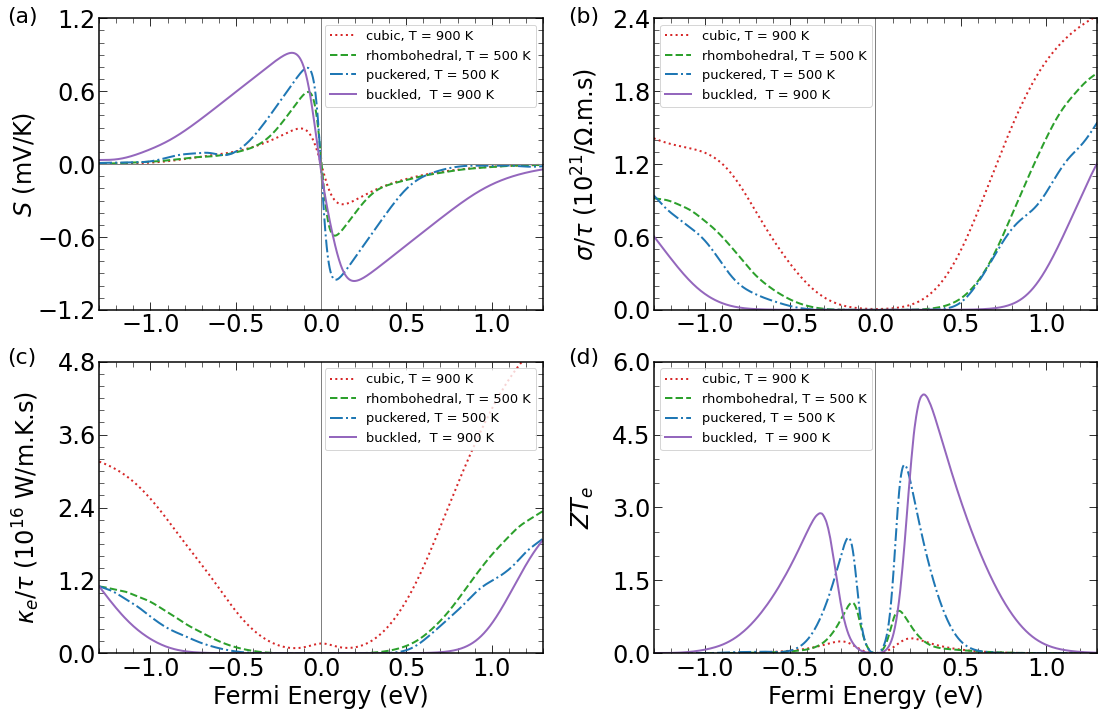

In [3]:
# Import module and function

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# function for loading BoltzTraP data
def load_data(fname, colnames):
    
    # Find the number of columns. Takes the first line that isn't a comment. 
    with open(fname) as f:
        j=f.readline()
        if j[0] == '#':
            j=f.readline()
        ncols=len(j.split())
    
    # Check that the length of colnames agrees with the output data
    if len(colnames) != ncols:
        print("ERROR:  len(colnames) != ncols.")
        print("The names are not commensurate.")
        print("Is there a different number of columns?")
        print('len(colnames) = ',len(colnames))
        print('ncols = ',ncols)
        return
    
    # Load the file
    d=np.loadtxt(fname, usecols=range(0,ncols) ).T
    
    # Creat a dictionary object, in which a 'key' represents each column name
    data={}
    for col, name in enumerate(colnames):
        data[name] = d[col]
    return data

# Unit conversion
eVtoRy = 0.0734986176
eVtoHa = 0.0734986176 / 2
RytoeV = 1/eVtoRy
HatoeV = 1/eVtoHa

# .trace file column labels
colnames_trace=[ 'mu', 'T' , 'N', 'sdos' , 'S' , 
                'sigma' , 'Rh' , 'kappa0' , 'cv_el' , 'chi' ]

# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 24
plt.rcParams['axes.linewidth'] = 1.5

# Create figure object
fig = plt.figure(figsize=(14, 9))

# Add x and y-axes 
axS   = fig.add_axes([0.00, 0.53, 0.44, 0.45])
axSig = fig.add_axes([0.55, 0.53, 0.44, 0.45])
axKap = fig.add_axes([0.00, 0.00, 0.44, 0.45])
axZT  = fig.add_axes([0.55, 0.00, 0.44, 0.45])

# Edit the major and minor ticks of the x and y axes
axS.xaxis.set_tick_params(which='major', size=8, direction='in', top='on')
axS.xaxis.set_tick_params(which='minor', size=5, direction='in', top='on')
axSig.xaxis.set_tick_params(which='major', size=8, direction='in', top='on')
axSig.xaxis.set_tick_params(which='minor', size=5, direction='in', top='on')
axKap.xaxis.set_tick_params(which='major', size=8, direction='in', top='on')
axKap.xaxis.set_tick_params(which='minor', size=5, direction='in', top='on')
axZT.xaxis.set_tick_params(which='major', size=8, direction='in', top='on')
axZT.xaxis.set_tick_params(which='minor', size=5, direction='in', top='on')

axS.yaxis.set_tick_params(which='major', size=8, direction='in', right='on')
axS.yaxis.set_tick_params(which='minor', size=5, direction='in', right='on')
axSig.yaxis.set_tick_params(which='major', size=8, direction='in', right='on')
axSig.yaxis.set_tick_params(which='minor', size=5, direction='in', right='on')
axKap.yaxis.set_tick_params(which='major', size=8, direction='in', right='on')
axKap.yaxis.set_tick_params(which='minor', size=5, direction='in', right='on')
axZT.yaxis.set_tick_params(which='major', size=8, direction='in', right='on')
axZT.yaxis.set_tick_params(which='minor', size=5, direction='in', right='on')

######################################################
# bulk Cubic
######################################################

## Data location
GeTeC   = 'bulk-c/dos/interpolation'
dataC   = load_data(GeTeC+'.trace', colnames_trace)

TC900   = np.isclose(dataC['T'], 900)

muGeTeC = dataC['mu'][TC900]
SGeTeC  = dataC['S'][TC900]
SigGeTeC= dataC['sigma'][TC900]
KapGeTeC= dataC['kappa0'][TC900]

EfGeTeC = 10.98

######################################################
# bulk Rhombohedral
######################################################

## Data location
GeTeR   = 'bulk-r/dos/interpolation'
dataR   = load_data(GeTeR+'.trace', colnames_trace)

TR500   = np.isclose(dataR['T'], 500)

muGeTeR = dataR['mu'][TR500]
SGeTeR  = dataR['S'][TR500] 
SigGeTeR= dataR['sigma'][TR500]
KapGeTeR= dataR['kappa0'][TR500]

EfGeTeR = 10.58

######################################################
# monolayer Puckered
######################################################

## Data location
GeTeP   = 'mono-s/dos/interpolation'
dataP   = load_data(GeTeP+'.trace', colnames_trace)

TP500   = np.isclose(dataP['T'], 500)

muGeTeP = dataP['mu'][TP500]
SGeTeP  = dataP['S'][TP500]
SigGeTeP= dataP['sigma'][TP500]
KapGeTeP= dataP['kappa0'][TP500]

EfGeTeP = 0.54
lP      = 20/3.0494476984 # scaling factor

######################################################
# monolayer Buckled
######################################################

## Data location
GeTeB   = 'mono-h/dos/interpolation'
dataB   = load_data(GeTeB+'.trace', colnames_trace)

TB900   = np.isclose(dataB['T'], 900)

muGeTeB = dataB['mu'][TB900]
SGeTeB  = dataB['S'][TB900]
SigGeTeB= dataB['sigma'][TB900]
KapGeTeB= dataB['kappa0'][TB900]

EfGeTeB = -1.31
lB      = 20/1.55612398 # scaling factor

#----------------------------------------------------------------------
# Plotting
#----------------------------------------------------------------------

#----------------------------------------------------------------------
# Seebeck coefficient
#----------------------------------------------------------------------

# bulk cubic 900 K
axS.plot(muGeTeC*RytoeV-EfGeTeC, SGeTeC*1e3, color='C3', linestyle=':',
         linewidth=2, label='cubic, T = 900 K')

# bulk rhombohedral 500 K
axS.plot(muGeTeR*RytoeV-EfGeTeR, SGeTeR*1e3, color='C2', linestyle='--',
         linewidth=2, label='rhombohedral, T = 500 K')

# monolayer puckered 500 K
axS.plot(muGeTeP*RytoeV-EfGeTeP, SGeTeP*1e3, color='C0', linestyle='-.',
         linewidth=2, label='puckered, T = 500 K')

# monolayer buckled 900 K
axS.plot(muGeTeB*RytoeV-EfGeTeB, SGeTeB*1e3, color='C4', linestyle='-',
         linewidth=2, label='buckled,  T = 900 K')

#----------------------------------------------------------------------
# Electrical conductivity
#----------------------------------------------------------------------

# bulk cubic 900 K
axSig.plot(muGeTeC*RytoeV-EfGeTeC, SigGeTeC*1e-21, color='C3', linestyle=':',
         linewidth=2, label='cubic, T = 900 K')

# bulk rhombohedral 500 K
axSig.plot(muGeTeR*RytoeV-EfGeTeR, SigGeTeR*1e-21, color='C2', linestyle='--',
         linewidth=2, label='rhombohedral, T = 500 K')

# monolayer puckered 500 K
axSig.plot(muGeTeP*RytoeV-EfGeTeP, lP*SigGeTeP*1e-21, color='C0', linestyle='-.',
         linewidth=2, label='puckered, T = 500 K')

# monolayer buckled 900 K
axSig.plot(muGeTeB*RytoeV-EfGeTeB, lB*SigGeTeB*1e-21, color='C4', linestyle='-',
         linewidth=2, label='buckled,  T = 900 K')

#----------------------------------------------------------------------
# Electronic thermal conductivity
#----------------------------------------------------------------------

# bulk cubic 900 K
axKap.plot(muGeTeC*RytoeV-EfGeTeC, KapGeTeC*1e-16, color='C3', linestyle=':',
         linewidth=2, label='cubic, T = 900 K')

# bulk rhombohedral 500 K
axKap.plot(muGeTeR*RytoeV-EfGeTeR, KapGeTeR*1e-16, color='C2', linestyle='--',
         linewidth=2, label='rhombohedral, T = 500 K')

# monolayer puckered 500 K
axKap.plot(muGeTeP*RytoeV-EfGeTeP, lP*KapGeTeP*1e-16, color='C0', linestyle='-.',
         linewidth=2, label='puckered, T = 500 K')

# monolayer buckled 900 K
axKap.plot(muGeTeB*RytoeV-EfGeTeB, lB*KapGeTeB*1e-16, color='C4', linestyle='-',
         linewidth=2, label='buckled,  T = 900 K')

#----------------------------------------------------------------------
# ZTe
#----------------------------------------------------------------------

# bulk cubic 900 K
axZT.plot(muGeTeC*RytoeV-EfGeTeC, 0.1*900*SGeTeC**2*SigGeTeC/KapGeTeC, color='C3', 
          linestyle=':', linewidth=2, label='cubic, T = 900 K')

# bulk rhombohedral 500 K
axZT.plot(muGeTeR*RytoeV-EfGeTeR, 0.1*500*SGeTeR**2*SigGeTeR/KapGeTeR, color='C2',
          linestyle='--', linewidth=2, label='rhombohedral, T = 500 K')

# monolayer puckered 500 K
axZT.plot(muGeTeP*RytoeV-EfGeTeP, 0.1*500*SGeTeP**2*SigGeTeP/KapGeTeP, color='C0',
          linestyle='-.', linewidth=2, label='puckered, T = 500 K')

# monolayer buckled 900 K
axZT.plot(muGeTeB*RytoeV-EfGeTeB, 0.1*900*SGeTeB**2*SigGeTeB/KapGeTeB, color='C4', 
          linestyle='-', linewidth=2, label='buckled,  T = 900 K')

#######################################################################
# Format Axis Labels and Ticks
#######################################################################

axS.axhline(0, color= 'grey', linestyle='-', linewidth=1)
axS.axvline(0, color= 'grey', linestyle='-', linewidth=1)
axS.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
axS.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))
axS.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.6))
axS.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))
axS.set_xlim(-1.3,1.3); axS.set_ylim(-1.2,1.2)
axS.legend(loc='best',fontsize=13)
axS.set_ylabel(r'$S$ (mV/K)', labelpad=0)

axSig.axvline(0, color= 'grey', linestyle='-', linewidth=1)
axSig.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
axSig.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))
axSig.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.6))
axSig.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))
axSig.set_xlim(-1.3,1.3); axSig.set_ylim(0,2.4)
axSig.legend(loc='best',fontsize=13)
axSig.set_ylabel(r'$\sigma/\tau$ ($10^{21}$/$\Omega$.m.s)', labelpad=12)

axKap.axvline(0, color= 'grey', linestyle='-', linewidth=1)
axKap.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
axKap.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))
axKap.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1.2))
axKap.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.2))
axKap.set_xlim(-1.3,1.3); axKap.set_ylim(0,4.8)
axKap.legend(loc='upper right',fontsize=13)
axKap.set_ylabel(r'$\kappa_e/\tau$ ($10^{16}$ W/m.K.s)', labelpad=16)
axKap.set_xlabel('Fermi Energy (eV)')

axZT.axvline(0, color= 'grey', linestyle='-', linewidth=1)
axZT.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
axZT.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))
axZT.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1.5))
axZT.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))
axZT.set_xlim(-1.3,1.3); axZT.set_ylim(0,6)
axZT.legend(loc='best',fontsize=13)
axZT.set_ylabel(r'$ZT_e$', labelpad=16)
axZT.set_xlabel('Fermi Energy (eV)')

## Give panel labels
axS.text(  -1.84, 1.16, '(a)', fontsize=22)
axSig.text(-1.80, 2.36, '(b)', fontsize=22)
axKap.text(-1.84, 4.76, '(c)', fontsize=22)
axZT.text( -1.80, 5.96, '(d)', fontsize=22)

#################################################################################
# Save figure
plt.savefig('FigTE.pdf',bbox_inches='tight')